In [1]:
import numpy as np
import pandas as pd

# 3. ニューラルネットワーク

前章のおさらい

- パーセプトロンは様々な複雑な表現を(理論上)表現できる
- ただし、重みを設定する作業が必要
- ニューラルネットワークは、**パーセプトロンの適切な重みパラメータをデータから自動で学習できる**

## パーセプトロンの定義

パーセプトロンは以下の式で定義される

$$
y = h(b + w1x1 + w2x2)
$$

- パーセプトロンの動作は、$ x1 $ と$ x2 $と$ 1 $ の3つの信号がニューロンの入力となる

- それら3 つの信号に**それぞれの重みが乗算され**、次のニューロンに送信される

- 次のニューロンでは重み付けされた信号の和が計算され、その和が0を超えたら1を出力し、そうでなければ0を出力する

- $ h(x) $は**活性化関数 (activation function)**と呼ばれ、入力信号のの総和を出力信号に変換する



# 3.2. 活性化関数

- 活性化関数には様々な種類が存在する



## 3.2.2 ステップ関数

- ステップ関数は0を境にして、出力が0から1に切り替わる
- 階段状に値が切り替わるため、階段関数と呼ばれることもある

In [2]:
"""
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0
"""

def step_function(x):
    y = x > 0
    return y.astype(np.int32)

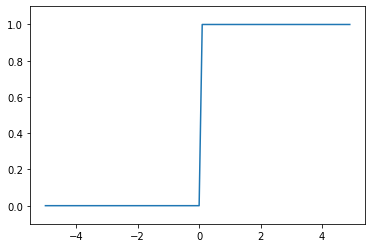

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5., 5., .1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-.1, 1.1)  # Set y-axis range
plt.show()

## NumPy実装の解説

NumPy配列に対して不等号の演算を行うと、配列の各要素に対するブーリアンの配列が生成される

In [4]:
x = np.array([-1.0, 1.0, 2.0])

y = x > 0
y

array([False,  True,  True])

ステップ関数はint型を出力する関数であるため、出力yの要素の方をintにキャストする

In [5]:
y = y.astype(np.int32)
y

array([0, 1, 1], dtype=int32)

## 3.2.1. シグモイド関数

$$
h(x) = \frac{1}{1+\exp(-x)}
$$

- NNで良く用いられる活性化関数としてシグモイド関数が挙げられる

- $ \exp(-x) $ は $ e^{-x} $を意味し、$ e $ はネイピア数(自然対数の底)である

- パーセプトロンとNNの主な違いは活性化関数だけしかない

- つまり、ニューロンが多層につながる構造や信号の伝達方法は、パーセプトロンと同様となる

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1., 1., 2.])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

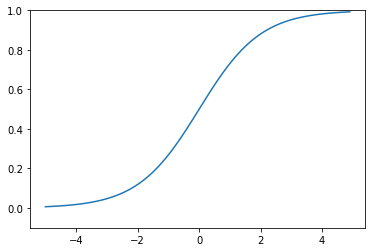

In [9]:
x = np.arange(-5., 5., .1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.0, 1)  # Set y-axis range
plt.show()

### NumPy実装の解説

- numpyのブロードキャスト機能により、スカラ値とNumPy配列での演算が行われると、スカラ値とNumPy配列の要素同士で演算が行われる

- sigmoid関数の実装でも`np.exp(-x)`はNumPy配列を生成するため  
  `1 / (1 + np.exp(-x))`の結果はNumPy配列の各要素間で計算されることになる

In [ ]:
t = np.array([1., 2., 3.])
print(1. + t)
print('---')
print(1. / t)

## シグモイド関数とステップ関数の比較


**異なる点**

- ステップ関数は0を境に急激に出力が変わる
- シグモイド関数は滑らかな曲線で、入力に対して連続的に出力が変化する
    - シグモイド関数の"滑らかさ"がNNの学習において重要な意味を持つ

- ステップ関数が0 or 1の二値のみを返すのに対して  
  シグモイド関数は実数値を返す

**共通する点**

- 入力が小さい時には出力は0に近く、入力が大きくなるに従い出力が1に近づく

- 入力信号が重要な情報であれば大きな値を出力し、入力信号が重要でなければ小さな値を出力する

- 入力信号の大きさに依存せず、**出力信号は必ず0から1の範囲を取る**

- 両関数とも**非線形な関数に分類される**
  - 直線で表現できない

## 3.2.6 非線形関数

- ** NNでは活性化関数に非線形関数を用いる必要がある **

- 活性化関数に線形関数を用いると層を深くすることの意味がなくなってしまう
    - 線形関数はいくら層を深くしても、隠れ層のないネットワークと同じ表現力しか持たない



## 3.2.7 ReLU関数

- 入力が0以下ならば0を出力する
- 入力が0を超えていれば、その値をそのまま出力する

$$
\begin{equation}
h(x) = \left\{ \,
    \begin{aligned}
    x \quad ( x > 0 ) \\
    0 \quad (x \leqq 0) \\
    \end{aligned}
\right.
\end{equation}
$$
- 最近の活性化関数にはよく使われる

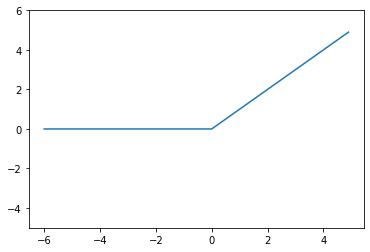

In [10]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-6.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-5.0, 6.0, 1.0)  # Set y-axis range
plt.show()